<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Авторы материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий и Data Scientist в Segmento Екатерина Демидова. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Часть 0. Работа с векторами в библиотеке NumPy

**Numpy** - это библиотека Python для вычислительно эффективных операций с многомерными массивами, предназначенная в основном для научных вычислений.

In [ ]:
# Python 2 and 3 compatibility
from __future__ import absolute_import, division, print_function, unicode_literals

# отключим предупреждения Anaconda
import warnings

warnings.simplefilter("ignore")
import numpy as np

In [4]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

Такой массив может содержать:
- значения физических величин в разые моменты времени при моделировании
- значения сигнала, измеренного прибором
- интенсивности пикселов 
- 3D координаты объектов, полученных, например, при МРТ
- ...


**Зачем NumPy:** Эффективность базовых операций 


In [5]:
a = np.array([0, 1, 2, 3, 4, 8.6573754])
a

array([0.       , 1.       , 2.       , 3.       , 4.       , 8.6573754])

In [6]:
L = range(1000)

In [7]:
%timeit [i**2 for i in L]

298 µs ± 18.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
L = range(10000)

In [11]:
%timeit [i**3 for i in L]

3.18 ms ± 85.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
a = np.arange(1000)

In [15]:
%timeit a**2

2.29 µs ± 232 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
a = np.arange(10000)

In [17]:
%timeit a**3

24.7 µs ± 2.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Интерактивная справка


In [18]:
?np.array

поиск в документации


In [19]:
np.lookfor("create array")

Search results for 'create array'
---------------------------------
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.lib.Arrayterator
    Buffered iterator for big arrays.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.ma.MaskedArray.__new__
    Create a new masked array from scratch.
nu

In [20]:
np.con*?

#### Библиотеку принято импортировать так

In [21]:
import numpy as np

## Создание массивов

* **1-D**:


In [22]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [23]:
aa = np.array([0, 1, 2, 3, 4, 5])
aa

array([0, 1, 2, 3, 4, 5])

In [24]:
a.ndim

1

In [27]:
aa.ndim

1

In [25]:
a.shape

(4,)

In [28]:
aa.shape

(6,)

In [26]:
len(a)

4

In [29]:
len(aa)

6

* **2-D, 3-D, ...**:


In [30]:
b = np.array([[0, 1, 2], [3, 4, 5]])  # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [31]:
bb = np.array([[0, 1, 2, 6, 7], [3, 4, 5, 8, 9]])  # 2 x 5 array
bb

array([[0, 1, 2, 6, 7],
       [3, 4, 5, 8, 9]])

In [32]:
b.ndim

2

In [33]:
bb.ndim

2

In [34]:
b.shape

(2, 3)

In [35]:
bb.shape

(2, 5)

In [36]:
len(b)  # returns the size of the first dimension

2

In [37]:
len(bb)

2

In [38]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [39]:
cc = np.array([[[1], [2], [6]], [[3], [4], [5]]])
cc

array([[[1],
        [2],
        [6]],

       [[3],
        [4],
        [5]]])

In [40]:
c.shape

(2, 2, 1)

In [41]:
cc.shape

(2, 3, 1)

## Методы для создания массивов

На практике мы редко добавляем элементы по одному


- Равномерно распределенные элементы:


In [42]:
a = np.arange(10)  # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
b = np.arange(1, 9, 2)  # start, end (exclusive), step
b

array([1, 3, 5, 7])

In [44]:
aa = np.arange(15)  # 0 .. n-1  (!)
aa

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [45]:
b = np.arange(1, 9, 2)  # start, end (exclusive), step
b

array([1, 3, 5, 7])

In [47]:
bb = np.arange(6, 40, 3)  # start, end (exclusive), step
bb

array([ 6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39])

- по числу элементов:


In [48]:
c = np.linspace(0, 1, 6)  # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [49]:
cc = np.linspace(3, 1, 8)  # start, end, num-points
cc

array([3.        , 2.71428571, 2.42857143, 2.14285714, 1.85714286,
       1.57142857, 1.28571429, 1.        ])

In [50]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

In [51]:
dd = np.linspace(9, 27, 2, endpoint=False)
dd

array([ 9., 18.])

- Часто встречающиеся массивы:


In [52]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [53]:
aa = np.ones((4, 2))  # reminder: (3, 3) is a tuple
aa

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [54]:
b = np.zeros((2, 2))
b

array([[0., 0.],
       [0., 0.]])

In [56]:
bb = np.zeros((7, 7))
bb

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [57]:
c = np.eye(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [58]:
cc = np.eye(6)
cc

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [59]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [60]:
dd = np.diag(np.array([1, 2, 3, 4, 6, 7, 9, 60.45]))
dd

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  2.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  3.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  4.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  6.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  7.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  9.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 60.45]])

* `np.random` генерация случайных чисел (Mersenne Twister PRNG):

In [61]:
a = np.random.rand(4)  # uniform in [0, 1]
a

array([0.50755507, 0.0211933 , 0.43352176, 0.44631306])

In [62]:
aa = np.random.rand(7)  # uniform in [0, 1]
aa

array([0.23881999, 0.83024573, 0.74476418, 0.586479  , 0.49286785,
       0.48735588, 0.2667407 ])

In [64]:
b = np.random.randn(4)  # Gaussian
b

array([ 0.28858132, -0.54257952,  0.17160238,  0.98281783])

In [66]:
bb = np.random.randn(8)  # Gaussian
bb

array([-0.73103334, -1.0227737 ,  0.99599297,  0.95555793,  0.71384077,
        0.13337096, -0.80703831, -0.34201078])

In [69]:
np.random.seed(1234)  # Setting the random seed

In [68]:
np.random.seed(12345)  # Setting the random seed

## Основные типы данных NumPy

Точка после числа означает, что это тип данных `float64`


In [80]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [73]:
b = np.array([1.0, 2.0, 3.0])
b.dtype

dtype('float64')

In [74]:
bb = np.array([1, 2, 3.0, 4])
bb.dtype

dtype('float64')

Можно задать тип данных явно. По умолчанию - `float64`

In [75]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

In [78]:
cc = np.array([1, 2, 3.7], dtype=int)
cc.dtype
cc

array([1, 2, 3])

In [81]:
a = np.ones((3, 3))
a.dtype

dtype('float64')

Прочие типы данных:

- Комплексные числа


In [86]:
d = np.array([1 + 2j, 3 + 4j, 5 + 6 * 1j])
d.dtype

dtype('complex128')

In [87]:
dd = np.array([1.6434, 3 + 4j, 5])
dd.dtype

dtype('complex128')

 - Bool


In [91]:
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

In [93]:
ee = np.array([True, 2, 4.6, 45 -7j])
ee

array([ 1. +0.j,  2. +0.j,  4.6+0.j, 45. -7.j])

In [94]:
ee.dtype

dtype('complex128')

- Строки

На строки память выделяется "жадно" - по максимальному числу литер в строке. 
В этом примере на каждую строку выделяется по 7 литер, и тип данных - 'S7'

In [95]:
f = np.array(["Bonjour", "Hello", "Hallo",])
f.dtype  # <--- strings containing max. 7 letters

dtype('<U7')

In [97]:
ff = np.array(["Bonjour and Zdraste", "Hello for bye", "Hallo AMIGO",])
ff.dtype  # <--- strings containing max. 19 letters

dtype('<U19')

## Основы визуализации

$ ipython notebook --pylab=inline

Или из тетрадки:

In [98]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Параметр `inline` говорит серверу IPython о том, что результаты будут отображаться в самой тетрадке, а не в новом окне. 


Импортируем *Matplotlib*


In [99]:
import matplotlib.pyplot as plt  # the tidy way

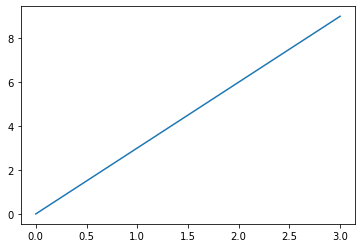

In [105]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)  # line plot
plt.show()  # <-- shows the plot (not needed with pylab)

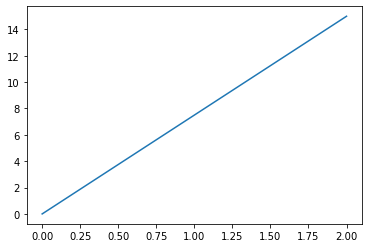

In [109]:
xx = np.linspace(0, 2, 25)
yy = np.linspace(0, 15, 25)
plt.plot(xx, yy)  # line plot
plt.show()  # <-- shows the plot (not needed with pylab)

Или с использованием *pylab*:


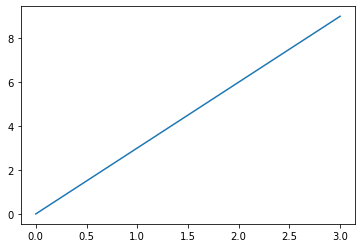

In [101]:
plot(x, y)  # line plot

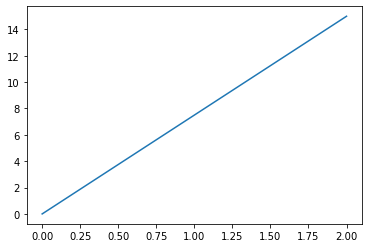

In [110]:
plot(xx, yy)  # line plot

Использование `import matplotlib.pyplot as plt` рекомендуется для скриптов, а `pylab` - в тетрадках IPython.

 - Отображение одномерных массивов:


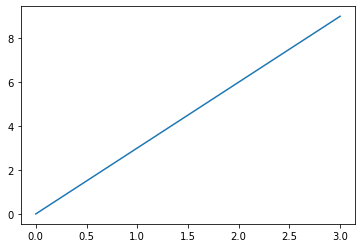

In [111]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)  # line plot

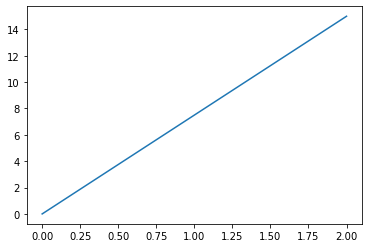

In [112]:
xx = np.linspace(0, 2, 25)
yy = np.linspace(0, 15, 25)
plt.plot(xx, yy)  # line plot

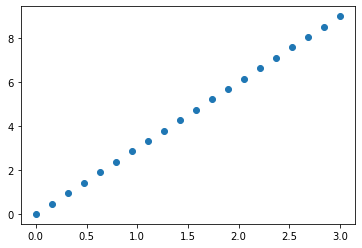

In [113]:
plt.plot(x, y, "o")  # dot plot

- Отображение двухмерных массивов (например, изображений):


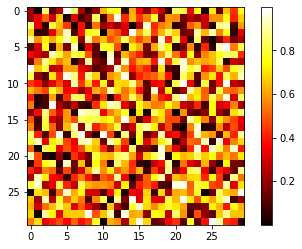

In [116]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)
plt.colorbar()

## Индексирование массивов и срезы

В целом так же, как со встроенными последовательностями Python (например, как со списками).


In [117]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [118]:
aa = np.arange(34)
aa

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [119]:
a[0], a[2], a[-1]

(0, 2, 9)

In [120]:
aa[4], aa[0], aa[5], aa[2], aa[-1], aa[0]

(4, 0, 5, 2, 33, 0)

Работает и популярный в Python способ отражения массива:


In [121]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [122]:
aa[::-1]

array([33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

Для многомерных массивов индексы - это кортежи целых чисел


In [123]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [134]:
aa = np.diag(np.arange(5))
aa

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]])

In [133]:
a[1, 1]

1

In [135]:
aa[3][0]

0

In [136]:
a[2, 1] = 10  # third line, second column
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [137]:
aa[3][-1] = 23  # third line, second column
aa

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0],
       [ 0,  0,  2,  0,  0],
       [ 0,  0,  0,  3, 23],
       [ 0,  0,  0,  0,  4]])

In [138]:
a[1]

array([0, 1, 0])

In [140]:
aa[3]

array([ 0,  0,  0,  3, 23])

**Срезы**

In [141]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [142]:
aa = np.arange(20)
aa

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [143]:
a[2:9:3]  # [start:end:step]

array([2, 5, 8])

In [147]:
aa[1:16:8]  # [start:end:step]

array([1, 9])

Последний индекс не включается

In [148]:
a[:4]

array([0, 1, 2, 3])

По умолчанию \`start\` -  0,
\`end\` - индекс последнего элемента, \`step\` - 1:


In [149]:
a[1:3]

array([1, 2])

In [150]:
a[::2]

array([0, 2, 4, 6, 8])

In [151]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

Можно совмещать присваивание и срез:


In [152]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [154]:
aa = np.arange(20)
aa[18:] = 98
aa

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 98, 98])

In [156]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

In [159]:
bb = np.arange(12)
aa[8:] = bb[::-1]
aa

array([ 0,  1,  2,  3,  4,  5,  6,  7, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1,  0])

## Пример. Матрица делителей

Отобразить матрицу, в которой вычеркивается **(x, y)**, если **y** делится на **x**.

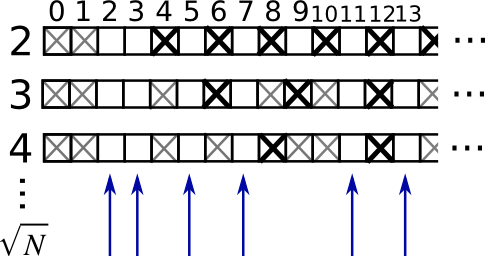

In [160]:
from IPython.display import Image

Image(filename="../../img/prime-sieve.png")

* Создадим массив `is_prime`, заполненний значениями True


In [161]:
is_prime = np.ones((100,), dtype=bool)

* Вычеркнем 0 и 1 как не являющиеся простыми:


In [164]:
is_prime[:2] = 0

* Для каждого натурального `j` начиная с  2, "вычеркнем" числа, ему кратные:


In [165]:
N_max = int(np.sqrt(len(is_prime)))
for j in range(2, N_max):
    is_prime[2 * j :: j] = False

is_prime

array([False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False])

## Индексирование масками

In [167]:
np.random.seed(3)
a = np.random.random_integers(0, 20, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [169]:
np.random.seed(56)
aa = np.random.random_integers(-4.8, 34, 8)
aa

array([17, 32, 11, -4, 30, 10, 19, 18])

In [170]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False])

In [174]:
(aa - 11 == 0)

array([False, False,  True, False, False, False, False, False])

In [175]:
mask = a % 3 == 0
extract_from_a = a[mask]  # or,  a[a%3==0]
extract_from_a  # extract a sub-array with the mask

array([ 3,  0,  9,  6,  0, 12])

In [177]:
maskk = aa - 11 == 0
extract_from_aa = aa[maskk]  # or,  a[a%3==0]
extract_from_aa  # extract a sub-array with the mask

array([11])

Индексирование маской может быть очень полезным для присваивания значений части элементов массива:


In [178]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

In [179]:
aa[aa - 11 == 0] = -1
aa

array([17, 32, -1, -4, 30, 10, 19, 18])

### Индексирование массивом целых чисел

In [180]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [181]:
aa = np.arange(-19, 67, 8)
aa

array([-19, -11,  -3,   5,  13,  21,  29,  37,  45,  53,  61])

In [182]:
a[[2, 3, 2, 4, 2]]  # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

In [183]:
aa[[1, 0, 6]]  # note: [2, 3, 2, 4, 2] is a Python list

array([-11, -19,  29])

In [184]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

In [186]:
aa[[-1, -3]] = 90
aa

array([-19, -11,  -3,   5,  13,  21,  29,  37,  90,  53,  90])

In [187]:
a = np.arange(10)
idx = np.array([[3, 4], [9, 7]])
idx.shape

(2, 2)

In [188]:
aa = np.arange(32)
idxx = np.array([[5, 8, 2], [12, 20, 21]])
idxx.shape

(2, 3)

In [189]:
a[idx]

array([[3, 4],
       [9, 7]])

In [190]:
aa[idxx]

array([[ 5,  8,  2],
       [12, 20, 21]])